## <span style="font-family: Latin Modern Roman; font-size: 25px;"> Survey Results </span>

In [1]:
import pandas as pd

survey_results_es = pd.read_csv('../data/survey_results_es.csv', header = 0)

In [2]:
columns_en = [
    'ID', 
    'Resp. ID', 
    'Submitted',
    'Device',
    'Age', 
    'Gender',
    'Education',
    'Occupation',
    'Ideology',
    'News Frequency',
    'News Channels',
    'Uses News Platform?',
    'Preferred Report',
    'Opinion on One-sided Report',
    'Wants Own Report?',
    'If Polarized Report...',
    'Comfort with Opposing Views?',
    'Diversity Helps Understanding?',
    'Did it Make You Reflect?'
]

translation_dict = {
    # Device
    'Ordenador/Tablet': 'Computer',
    'Móvil': 'Mobile',

    # Age
    'Menos de 18': '18-',
    '18-24': '18-24',
    '25-34': '25-34',
    '35-44': '35-44',
    '45-54': '45-54',
    '55-64': '55-64',
    '65 o más': '65+',

    # Gender
    'Mujer': 'Female',
    'Hombre': 'Male',

    # Education
    'Estudios avanzados de Posgrado (Máster o Doctorado)': 'Postgrad',
    'Estudios universitarios de Grado': 'Graduate',
    'Bachillerato o formación profesional equivalente': 'High School',
    'Educación secundaria': 'Some High School',
    'Educación primaria': 'Elementary',

    # Occupation
    'Empleado/a por cuenta ajena': 'Employed',
    'Autónomo/a': 'Self-employed',
    'Estudiante': 'Student',
    'Jubilado/a': 'Retired',
    'Desempleado/a': 'Unemployed',

    # Ideology
    'Extrema Izquierda': 'Far-left',
    'Izquierda': 'Left',
    'Centro-izquierda': 'Center-left',
    'Centro': 'Center',
    'Centro-derecha': 'Center-right',
    'Derecha': 'Right',
    'Extrema Derecha': 'Far-right',

    # News frequency
    'Una vez al día': 'Daily',
    'Varias veces a la semana': 'Few times/week',
    'Varias veces al día': 'Multiple/day',
    'Rara vez': 'Rarely',
    'Nunca': 'Never',

    # News channels (multi-choice)
    'Prensa digital generalista (ABC, El Mundo, El País)': 'Mainstream Press',
    'Prensa digital especializada o ideológica': 'Ideological Press',
    'Redes sociales (Twitter/X, Instagram, TikTok)': 'Social Media',
    'YouTube o podcats': 'YouTube/Podcasts',
    'Televisión': 'TV',
    'Radio': 'Radio',
    'Noticias enviadas por amigos o familiares': 'Shared by Contacts',

    # Personalized platforms
    'Sí': 'Yes',
    'No': 'No',

    # Report identification
    'Con el del usuario equilibrado (2)': 'Balanced (2)',
    'Con el del usuario polarizado (1)': 'Polarized (1)',
    'Con ninguno de los dos': 'Neither',

    # Opinion about one-sided report
    'Me preocupa, puede generar sesgos': 'Worrisome, bias risk',
    'Me parece comprensible, es normal buscar fuentes afines': 'Understandable, seeks alignment',
    'No me preocupa, cada persona es libre de leer solo lo que le interesa': 'Not a concern, personal choice',

    # Interest in own report
    'Sí, me ayudaría a reflexionar': 'Yes, would reflect',
    'Tal vez, dependiendo de cómo se presente': 'Maybe, depends',
    'No me interesa': 'Not interested',

    # Action if own report is polarized
    'Intentaría diversificar lo que leo': 'Would diversify',
    'Lo aceptaría como reflejo de mis intereses': 'Would accept it',
    'No cambiaría nada': 'Wouldn’t change',

    # Comfort with opposing views
    'Sí, totalmente': 'Yes, totally',
    'A veces, si están bien explicadas': 'Sometimes, if explained',
    'No, prefiero solo noticias alineadas con mi forma de pensar': 'No, prefer aligned',

    # Diversity benefit
    'Sí, sin duda': 'Yes, definitely',
    'En parte': 'Partially',
    'No necesariamente': 'Not really',

    # Reflection
    'Sí, bastante': 'Yes, a lot',
    'Un poco': 'A bit',
    'No mucho': 'Not much',
    'Nada en absoluto': 'Not at all'
}

In [3]:
import pandas as pd

def translate_survey(df_es, columns_en, translation_dict, multi_col_es):
    df_en = df_es.rename(columns=dict(zip(df_es.columns, columns_en)))
    multi_col_en = dict(zip(df_es.columns, columns_en))[multi_col_es]

    def translate_multichoice(value):
        if pd.isna(value):
            return value
        result = value
        for es, en in translation_dict.items():
            result = result.replace(es, en)
        return result

    df_en[multi_col_en] = df_en[multi_col_en].apply(translate_multichoice)

    for col in df_en.columns:
        if col != multi_col_en:
            df_en[col] = df_en[col].map(lambda x: translation_dict.get(x, x))

    return df_en

In [4]:
survey_results = translate_survey(
    df_es=survey_results_es,
    columns_en=columns_en,
    translation_dict=translation_dict,
    multi_col_es='Selecciona los canales que más utilices para informarte (puedes elegir varios)'
)

In [5]:
survey_results.to_csv("../data/survey_results_en.csv", index = False)

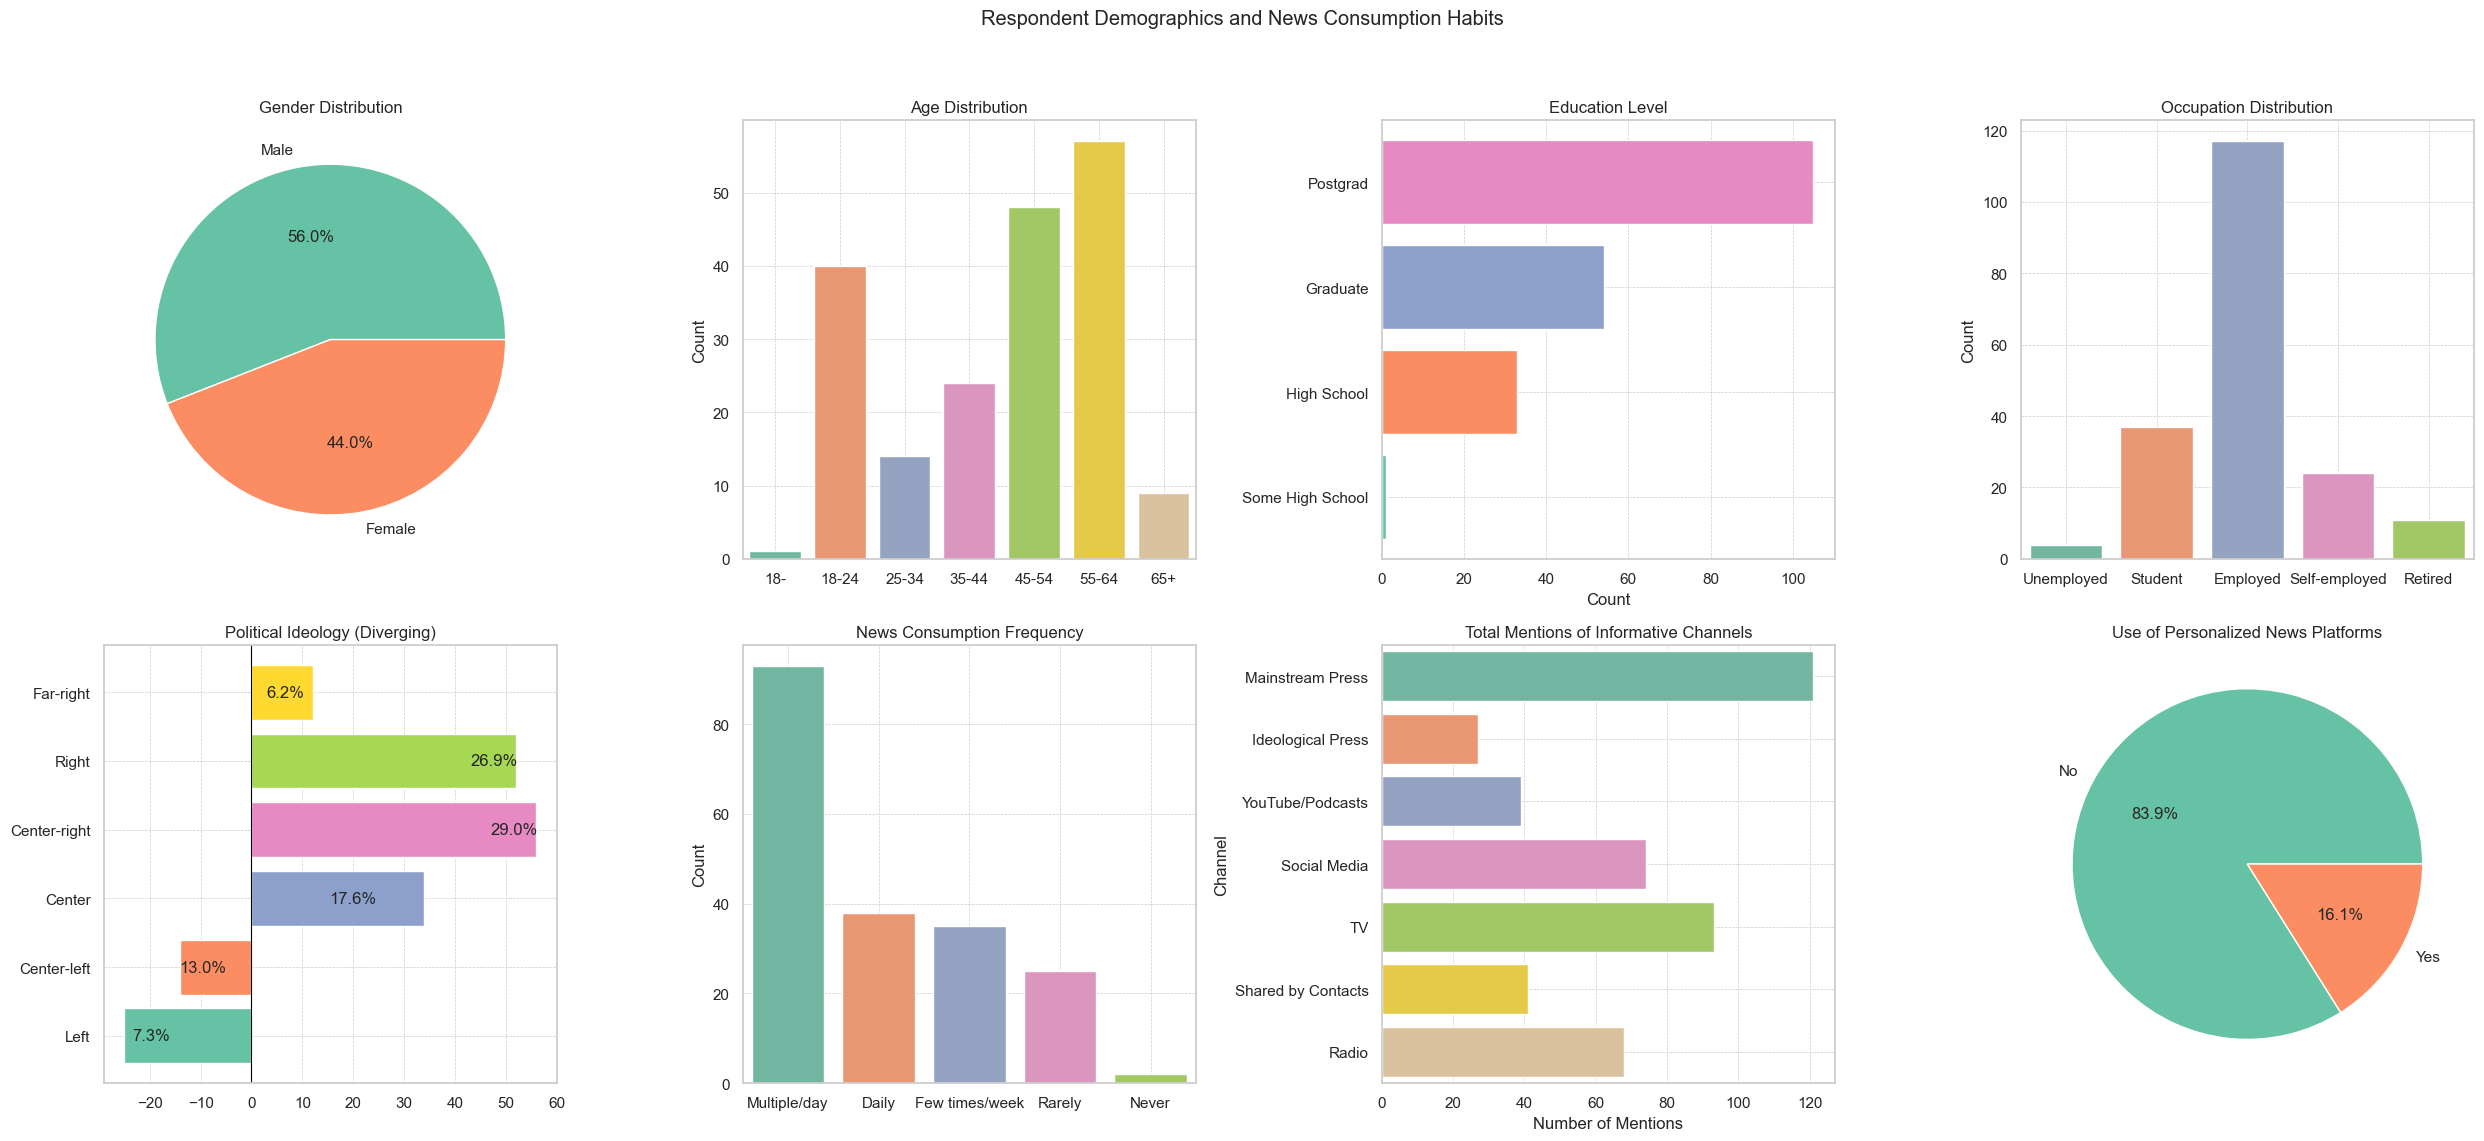

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

# Set theme and palette
sns.set_theme(style="whitegrid")
set2_colors = sns.color_palette("Set2")

fig, axs = plt.subplots(2, 4, figsize=(25, 12))
fig.suptitle('Respondent Demographics and News Consumption Habits')
axs = axs.flatten()

# 1. Gender
gender_counts = survey_results['Gender'].value_counts()
axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=set2_colors[:len(gender_counts)])
axs[0].set_title('Gender Distribution')

# 2. Age
age_order = ['18-', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
sns.countplot(data=survey_results, x='Age', order=age_order, palette=set2_colors[:7], ax=axs[1])
axs[1].set_title('Age Distribution')
axs[1].set_xlabel('')
axs[1].set_ylabel('Count')
axs[1].grid(True, ls='--', linewidth=0.5)

# 3. Education
edu_order = ['Postgrad', 'Graduate', 'High School', 'Some High School']
edu_counts = survey_results['Education'].value_counts()
edu_counts = edu_counts.reindex(edu_order)
edu_counts = edu_counts[::-1]
axs[2].barh(edu_counts.index, edu_counts.values, color=set2_colors[:len(edu_counts)])
axs[2].set_title('Education Level')
axs[2].set_xlabel('Count')
axs[2].grid(True, ls='--', linewidth=0.5)

# 4. Occupation
occupation_order = ['Unemployed', 'Student', 'Employed', 'Self-employed', 'Retired']
sns.countplot(data=survey_results, x='Occupation', order=occupation_order, palette=set2_colors[:5], ax=axs[3])
axs[3].set_title('Occupation Distribution')
axs[3].set_xlabel('')
axs[3].set_ylabel('Count')
axs[3].grid(True, ls='--', linewidth=0.5)

# 5. Ideology
ideology_order = ['Far-left', 'Left', 'Center-left', 'Center', 'Center-right', 'Right', 'Far-right']
ideo_counts = survey_results['Ideology'].value_counts().reindex(ideology_order).fillna(0)
ideo_counts = ideo_counts[ideo_counts > 0]
ideo_percentages = (ideo_counts / ideo_counts.sum() * 100).round(1)
left_group = ideo_counts[ideo_counts.index.isin(['Left', 'Center-left'])]
center_value = ideo_counts.get('Center', 0)
right_group = ideo_counts[ideo_counts.index.isin(['Center-right', 'Right', 'Far-right'])]
labels = list(left_group.index) + ['Center'] + list(right_group.index)
values = list(-left_group[::-1].values) + [0] + list(right_group.values)
colors = sns.color_palette("Set2", len(labels))
axs[4].barh(labels, values, color=colors)
axs[4].barh('Center', center_value, color=colors[labels.index('Center')])
for i, (label, value) in enumerate(zip(labels, values)):
    percentage = ideo_percentages[label]
    if value < 0:
        axs[4].text(value + 9, i, f'{percentage}%', va='center', ha='right', fontsize=12)
    elif value > 0:
        axs[4].text(value - 9, i, f'{percentage}%', va='center', ha='left', fontsize=12)
    else:
        axs[4].text(value + 20, i, f'{percentage}%', va='center', ha='center', fontsize=12)
axs[4].axvline(0, color='black', lw=0.8)
axs[4].set_title('Political Ideology (Diverging)')
axs[4].grid(True, ls='--', linewidth=0.5)

# 6. News Frequency
news_freq_order = ['Multiple/day', 'Daily', 'Few times/week', 'Rarely', 'Never']
sns.countplot(data=survey_results, x='News Frequency', order=news_freq_order, palette=set2_colors[:5], ax=axs[5])
axs[5].set_title('News Consumption Frequency')
axs[5].set_xlabel('')
axs[5].set_ylabel('Count')
axs[5].grid(True, ls='--', linewidth=0.5)

# 7. Informative Channels Used
channel_data = survey_results['News Channels'].dropna()
split_channels = [item.strip() for sublist in channel_data.str.split(',') for item in sublist]
channel_counts = Counter(split_channels)
sns.barplot(x=list(channel_counts.values()), y=list(channel_counts.keys()), palette=set2_colors, ax=axs[6])
axs[6].set_title('Total Mentions of Informative Channels')
axs[6].set_xlabel('Number of Mentions')
axs[6].set_ylabel('Channel')
axs[6].grid(True, ls='--', linewidth=0.5)

# 8. Personalized News Platform Use
platform_counts = survey_results['Uses News Platform?'].value_counts()
axs[7].pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=set2_colors[:len(platform_counts)])
axs[7].set_title('Use of Personalized News Platforms')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

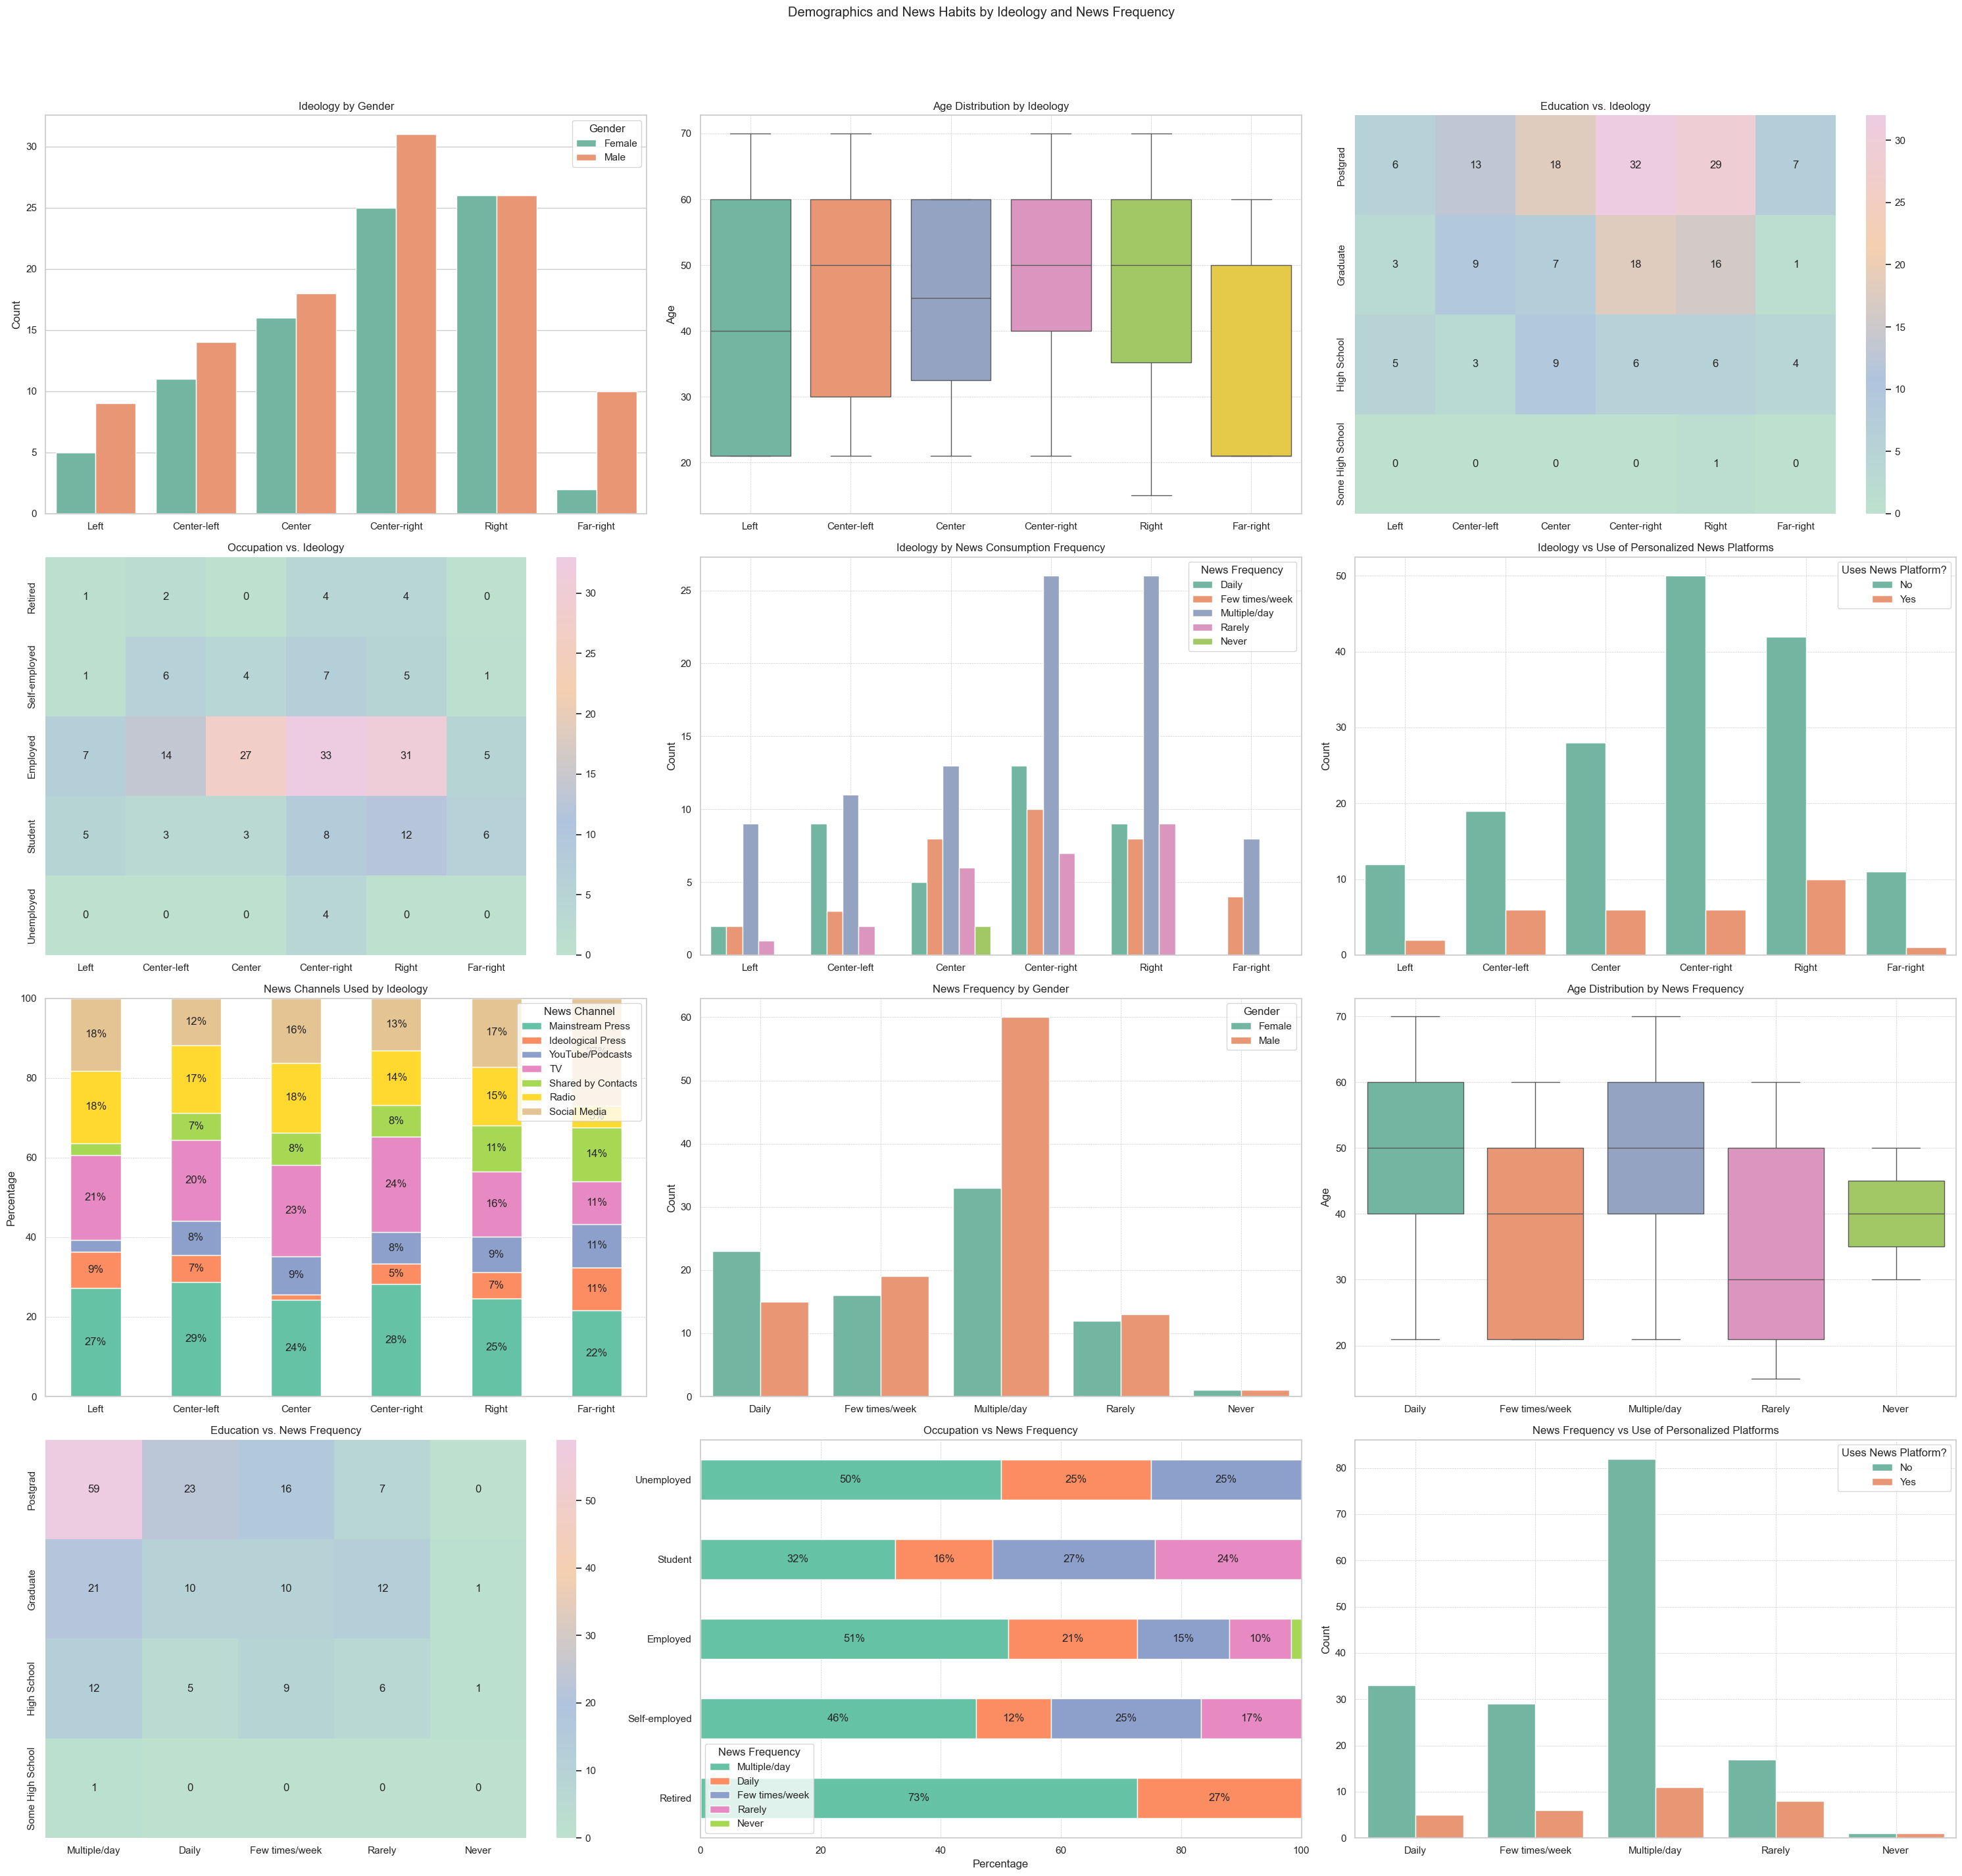

In [7]:
from collections import defaultdict, Counter

pastel_palette = sns.blend_palette(["#BDE1CE", "#B0C4DE", "#F5CFB0", "#EDCCE2"], as_cmap=True)
ideo_order = ['Left', 'Center-left', 'Center', 'Center-right', 'Right', 'Far-right']
age_map = {'18-': 15, '18-24': 21, '25-34': 30, '35-44': 40, '45-54': 50, '55-64': 60, '65+': 70}
survey_results['Age_num'] = survey_results['Age'].map(age_map)

fig, axs = plt.subplots(4, 3, figsize=(30, 30))
fig.suptitle('Demographics and News Habits by Ideology and News Frequency')
axs = axs.flatten()

# 1. Gender × Ideology
sns.countplot(data=survey_results, x='Ideology', hue='Gender', order=ideo_order, palette=set2_colors[:2], ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('Count')
axs[0].set_title('Ideology by Gender')

# 2. Age × Ideology
sns.boxplot(data=survey_results, x='Ideology', y='Age_num', order=ideo_order, palette=sns.color_palette("Set2", 6), ax=axs[1])
axs[1].set_title('Age Distribution by Ideology')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_ylabel('Age')
axs[1].grid(True, ls='--', linewidth=0.5)

# 3. Education × Ideology
edu_order = ['Postgrad', 'Graduate', 'High School', 'Some High School']
ct_ed_ideo = pd.crosstab(survey_results['Education'], survey_results['Ideology'])
ct_ed_ideo = ct_ed_ideo.reindex(index=edu_order)[ideo_order]
sns.heatmap(ct_ed_ideo, annot=True, fmt='d', cmap=pastel_palette, ax=axs[2])
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_title('Education vs. Ideology')

# 4. Occupation × Ideology
occupation_order = ['Retired', 'Self-employed', 'Employed', 'Student', 'Unemployed']
ct_occ_ideo = pd.crosstab(survey_results['Occupation'], survey_results['Ideology'])
ct_occ_ideo = ct_occ_ideo.reindex(index=occupation_order)[ideo_order]
sns.heatmap(ct_occ_ideo, annot=True, fmt='d', cmap=pastel_palette, ax=axs[3])
axs[3].set_xlabel('')
axs[3].set_ylabel('')
axs[3].set_title('Occupation vs. Ideology')

# 5. News Frequency × Ideology
sns.countplot(data=survey_results, x='Ideology', hue='News Frequency', order=ideo_order, palette="Set2", ax=axs[4])
axs[4].set_xlabel('')
axs[4].set_ylabel('Count')
axs[4].set_title('Ideology by News Consumption Frequency')
axs[4].grid(True, ls='--', linewidth=0.5)

# 6. Uses Personalized Platform × Ideology
sns.countplot(data=survey_results, x='Ideology', hue='Uses News Platform?', order=ideo_order, palette="Set2", ax=axs[5])
axs[5].set_xlabel('')
axs[5].set_ylabel('Count')
axs[5].set_title('Ideology vs Use of Personalized News Platforms')
axs[5].grid(True, ls='--', linewidth=0.5)

# 7. News Channels × Ideology
channel_per_ideology = defaultdict(Counter)
for _, row in survey_results.iterrows():
    ideology = row['Ideology']
    channels = row['News Channels']
    if pd.notna(ideology) and pd.notna(channels):
        for ch in channels.split(','):
            channel_per_ideology[ideology][ch.strip()] += 1

channel_ideo_df = pd.DataFrame(channel_per_ideology).fillna(0).astype(int)
channel_ideo_df = channel_ideo_df[ideo_order]
channel_ideo_pct = channel_ideo_df.div(channel_ideo_df.sum(axis=0), axis=1) * 100
channel_ideo_pct.T.plot(kind='bar', stacked=True, color=sns.color_palette("Set2", 7), ax=axs[6])
axs[6].set_title('News Channels Used by Ideology')
axs[6].set_ylabel('Percentage')
axs[6].set_xlabel('')
axs[6].set_ylim(0, 100)
axs[6].tick_params(axis='x', rotation=0)
axs[6].legend(title='News Channel')
axs[6].grid(True, ls='--', linewidth=0.5)
for i, ideology in enumerate(channel_ideo_pct.columns):
    cumulative = 0
    for channel in channel_ideo_pct.index:
        value = channel_ideo_pct.loc[channel, ideology]
        if value > 4:
            axs[6].text(
                i, cumulative + value / 2, f'{value:.0f}%',
                ha='center', va='center', fontsize=12
            )
        cumulative += value

# 8. Gender × News Frequency
sns.countplot(data=survey_results, x='News Frequency', hue='Gender', palette=set2_colors[:2], ax=axs[7])
axs[7].set_xlabel('')
axs[7].set_ylabel('Count')
axs[7].set_title('News Frequency by Gender')
axs[7].grid(True, ls='--', linewidth=0.5)

# 9. Age × News Frequency
sns.boxplot(data=survey_results, x='News Frequency', y='Age_num', palette="Set2", ax=axs[8])
axs[8].set_title('Age Distribution by News Frequency')
axs[8].set_ylabel('Age')
axs[8].set_xlabel('')
axs[8].grid(True, ls='--', linewidth=0.5)

# 10. Education × News Frequency
news_freq_order = ['Multiple/day', 'Daily', 'Few times/week', 'Rarely', 'Never']
ct_edu_freq = pd.crosstab(survey_results['Education'], survey_results['News Frequency'])
ct_edu_freq = ct_edu_freq.reindex(index=edu_order)[news_freq_order]
sns.heatmap(ct_edu_freq, annot=True, fmt='d', cmap=pastel_palette, ax=axs[9])
axs[9].set_xlabel('')
axs[9].set_ylabel('')
axs[9].set_title('Education vs. News Frequency')

# 11. Occupation × News Frequency
ct_occ_freq = pd.crosstab(survey_results['Occupation'], survey_results['News Frequency'])
ct_occ_freq = ct_occ_freq.reindex(index=occupation_order)[news_freq_order]
ct_occ_freq_pct = ct_occ_freq.div(ct_occ_freq.sum(axis=1), axis=0) * 100

ct_occ_freq_pct.plot(kind='barh', stacked=True, color=sns.color_palette("Set2", 5), ax=axs[10])
axs[10].set_title('Occupation vs News Frequency')
axs[10].set_xlabel('Percentage')
axs[10].set_xlim(0, 100)
axs[10].set_ylabel('')
axs[10].legend(title='News Frequency', loc='lower left')
axs[10].grid(True, ls='--', linewidth=0.5)
for i, (idx, row) in enumerate(ct_occ_freq_pct.iterrows()):
    cumulative = 0
    for freq in news_freq_order:
        value = row[freq]
        if value > 3:
            axs[10].text(
                cumulative + value / 2,
                i,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12
            )
        cumulative += value

# 12. Uses Personalized Platform × News Frequency
sns.countplot(data=survey_results, x='News Frequency', hue='Uses News Platform?', palette="Set2", ax=axs[11])
axs[11].set_xlabel('')
axs[11].set_ylabel('Count')
axs[11].set_title('News Frequency vs Use of Personalized Platforms')
axs[11].grid(True, ls='--', linewidth=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

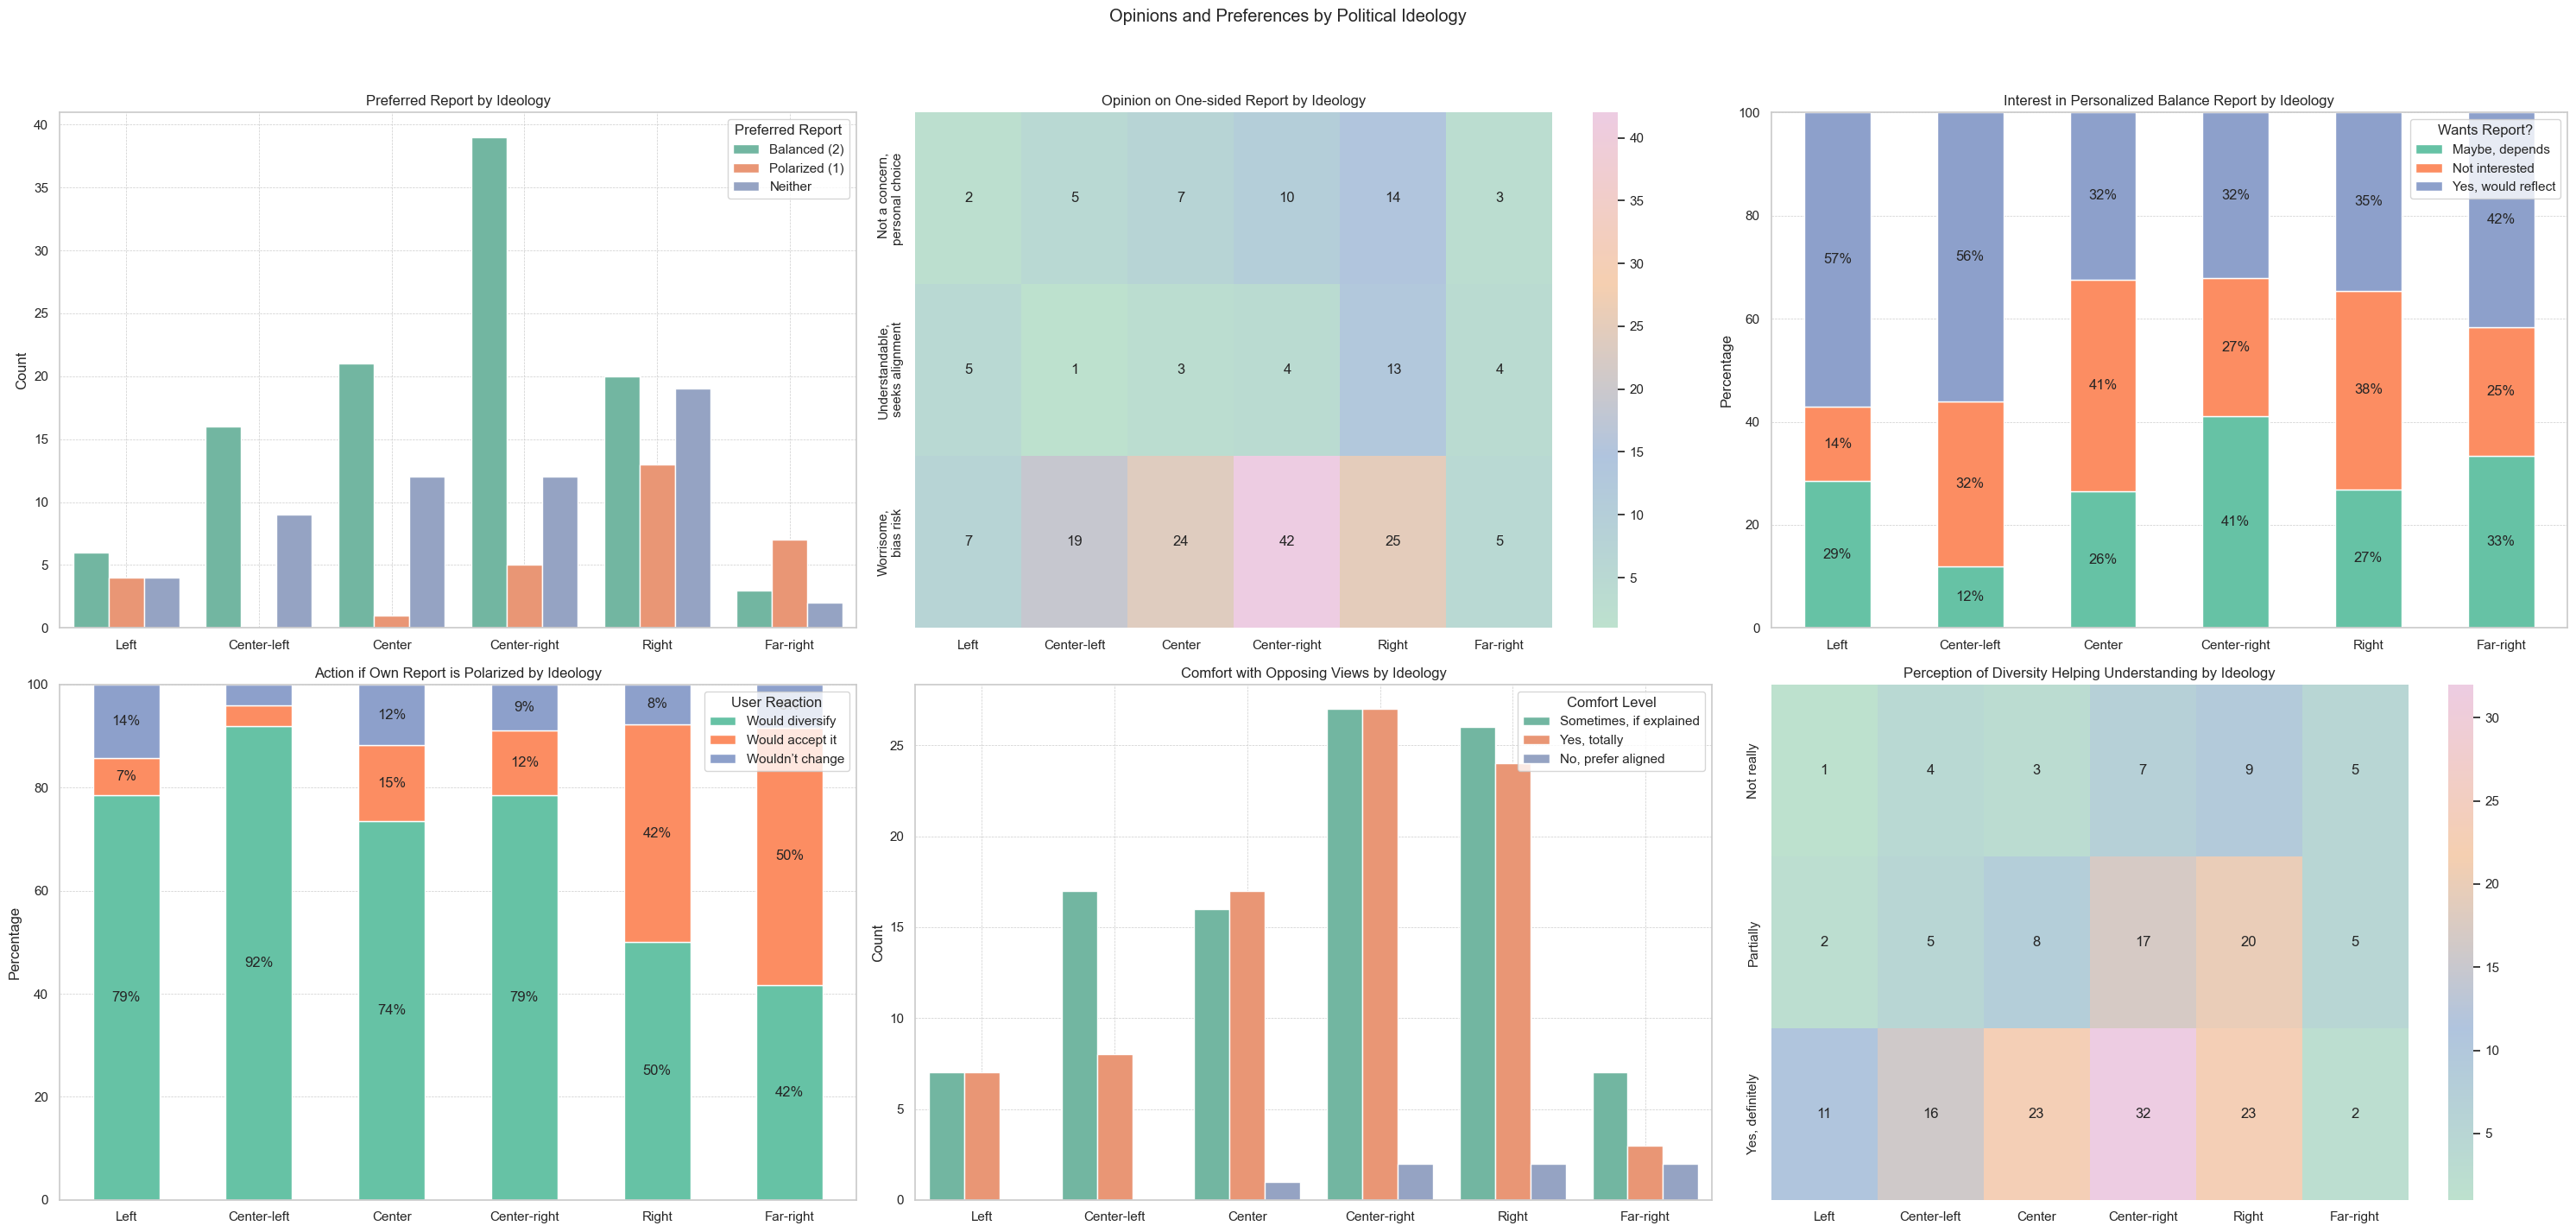

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(30, 15))
axs = axs.flatten()
fig.suptitle('Opinions and Preferences by Political Ideology')

ideo_order = ['Left', 'Center-left', 'Center', 'Center-right', 'Right', 'Far-right']
set2_colors = sns.color_palette("Set2")
stacked_colors = sns.color_palette("Set2", 3)

# 1. Preferred Report × Ideology
sns.countplot(data=survey_results, x='Ideology', hue='Preferred Report', order=ideo_order, palette=set2_colors, ax=axs[0])
axs[0].set_title('Preferred Report by Ideology')
axs[0].set_xlabel('')
axs[0].set_ylabel('Count')
axs[0].grid(True, ls='--', linewidth=0.5)
axs[0].legend(title='Preferred Report', loc='upper right')

# 2. Opinion on One-sided Report × Ideology
ct_opinion = pd.crosstab(survey_results['Opinion on One-sided Report'], survey_results['Ideology'])
ct_opinion = ct_opinion[ideo_order]
ct_opinion.index = [
    "Not a concern,\npersonal choice",
    "Understandable,\nseeks alignment",
    "Worrisome,\nbias risk"
]
sns.heatmap(ct_opinion, annot=True, fmt='d', cmap=pastel_palette, ax=axs[1])
axs[1].set_title('Opinion on One-sided Report by Ideology')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# 3. Wants Own Report? × Ideology
ct_wants_report = pd.crosstab(survey_results['Ideology'], survey_results['Wants Own Report?'])
ct_wants_report = ct_wants_report.reindex(index=ideo_order)
ct_wants_report_pct = ct_wants_report.div(ct_wants_report.sum(axis=1), axis=0) * 100

ct_wants_report_pct.plot(kind='bar', stacked=True, ax=axs[2], color=stacked_colors[:3])
axs[2].set_title('Interest in Personalized Balance Report by Ideology')
axs[2].set_ylabel('Percentage')
axs[2].set_ylim(0, 100)
axs[2].set_xlabel('')
axs[2].grid(True, ls='--', linewidth=0.5)
axs[2].tick_params(axis='x', rotation=0)
axs[2].legend(title='Wants Report?', loc='upper right')
for i, ideology in enumerate(ct_wants_report_pct.index):
    cumulative = 0
    for label in ct_wants_report_pct.columns:
        value = ct_wants_report_pct.loc[ideology, label]
        if value > 5:
            axs[2].text(
                i,
                cumulative + value / 2,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12
            )
        cumulative += value

# 4. If Polarized Report... × Ideology
ct_action = pd.crosstab(survey_results['Ideology'], survey_results['If Polarized Report...'])[[
    'Would diversify', 'Would accept it', 'Wouldn’t change'
]]
ct_action = ct_action.reindex(index=ideo_order)
ct_action_pct = ct_action.div(ct_action.sum(axis=1), axis=0) * 100
ct_action_pct.plot(kind='bar', stacked=True, ax=axs[3], color=stacked_colors[:3])
axs[3].set_title('Action if Own Report is Polarized by Ideology')
axs[3].set_ylabel('Percentage')
axs[3].set_ylim(0, 100)
axs[3].set_xlabel('')
axs[3].grid(True, ls='--', linewidth=0.5)
axs[3].tick_params(axis='x', rotation=0)
axs[3].legend(title='User Reaction', loc='upper right')
for i, ideology in enumerate(ct_action_pct.index):
    cumulative = 0
    for j, label in enumerate(ct_action_pct.columns):
        value = ct_action_pct.loc[ideology, label]
        if value > 5:
            axs[3].text(
                i,
                cumulative + value / 2,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12
            )
        cumulative += value

# 5. Comfort with Opposing Views × Ideology
sns.countplot(data=survey_results, x='Ideology', hue='Comfort with Opposing Views?', order=ideo_order, palette=set2_colors, ax=axs[4])
axs[4].set_title('Comfort with Opposing Views by Ideology')
axs[4].set_xlabel('')
axs[4].set_ylabel('Count')
axs[4].grid(True, ls='--', linewidth=0.5)
axs[4].legend(title='Comfort Level', loc='upper right')

# 6. Diversity Helps Understanding? × Ideology
ct_diversity = pd.crosstab(survey_results['Diversity Helps Understanding?'], survey_results['Ideology'])
ct_diversity = ct_diversity[ideo_order]
sns.heatmap(ct_diversity, annot=True, fmt='d', cmap=pastel_palette, ax=axs[5])
axs[5].set_title('Perception of Diversity Helping Understanding by Ideology')
axs[5].set_xlabel('')
axs[5].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

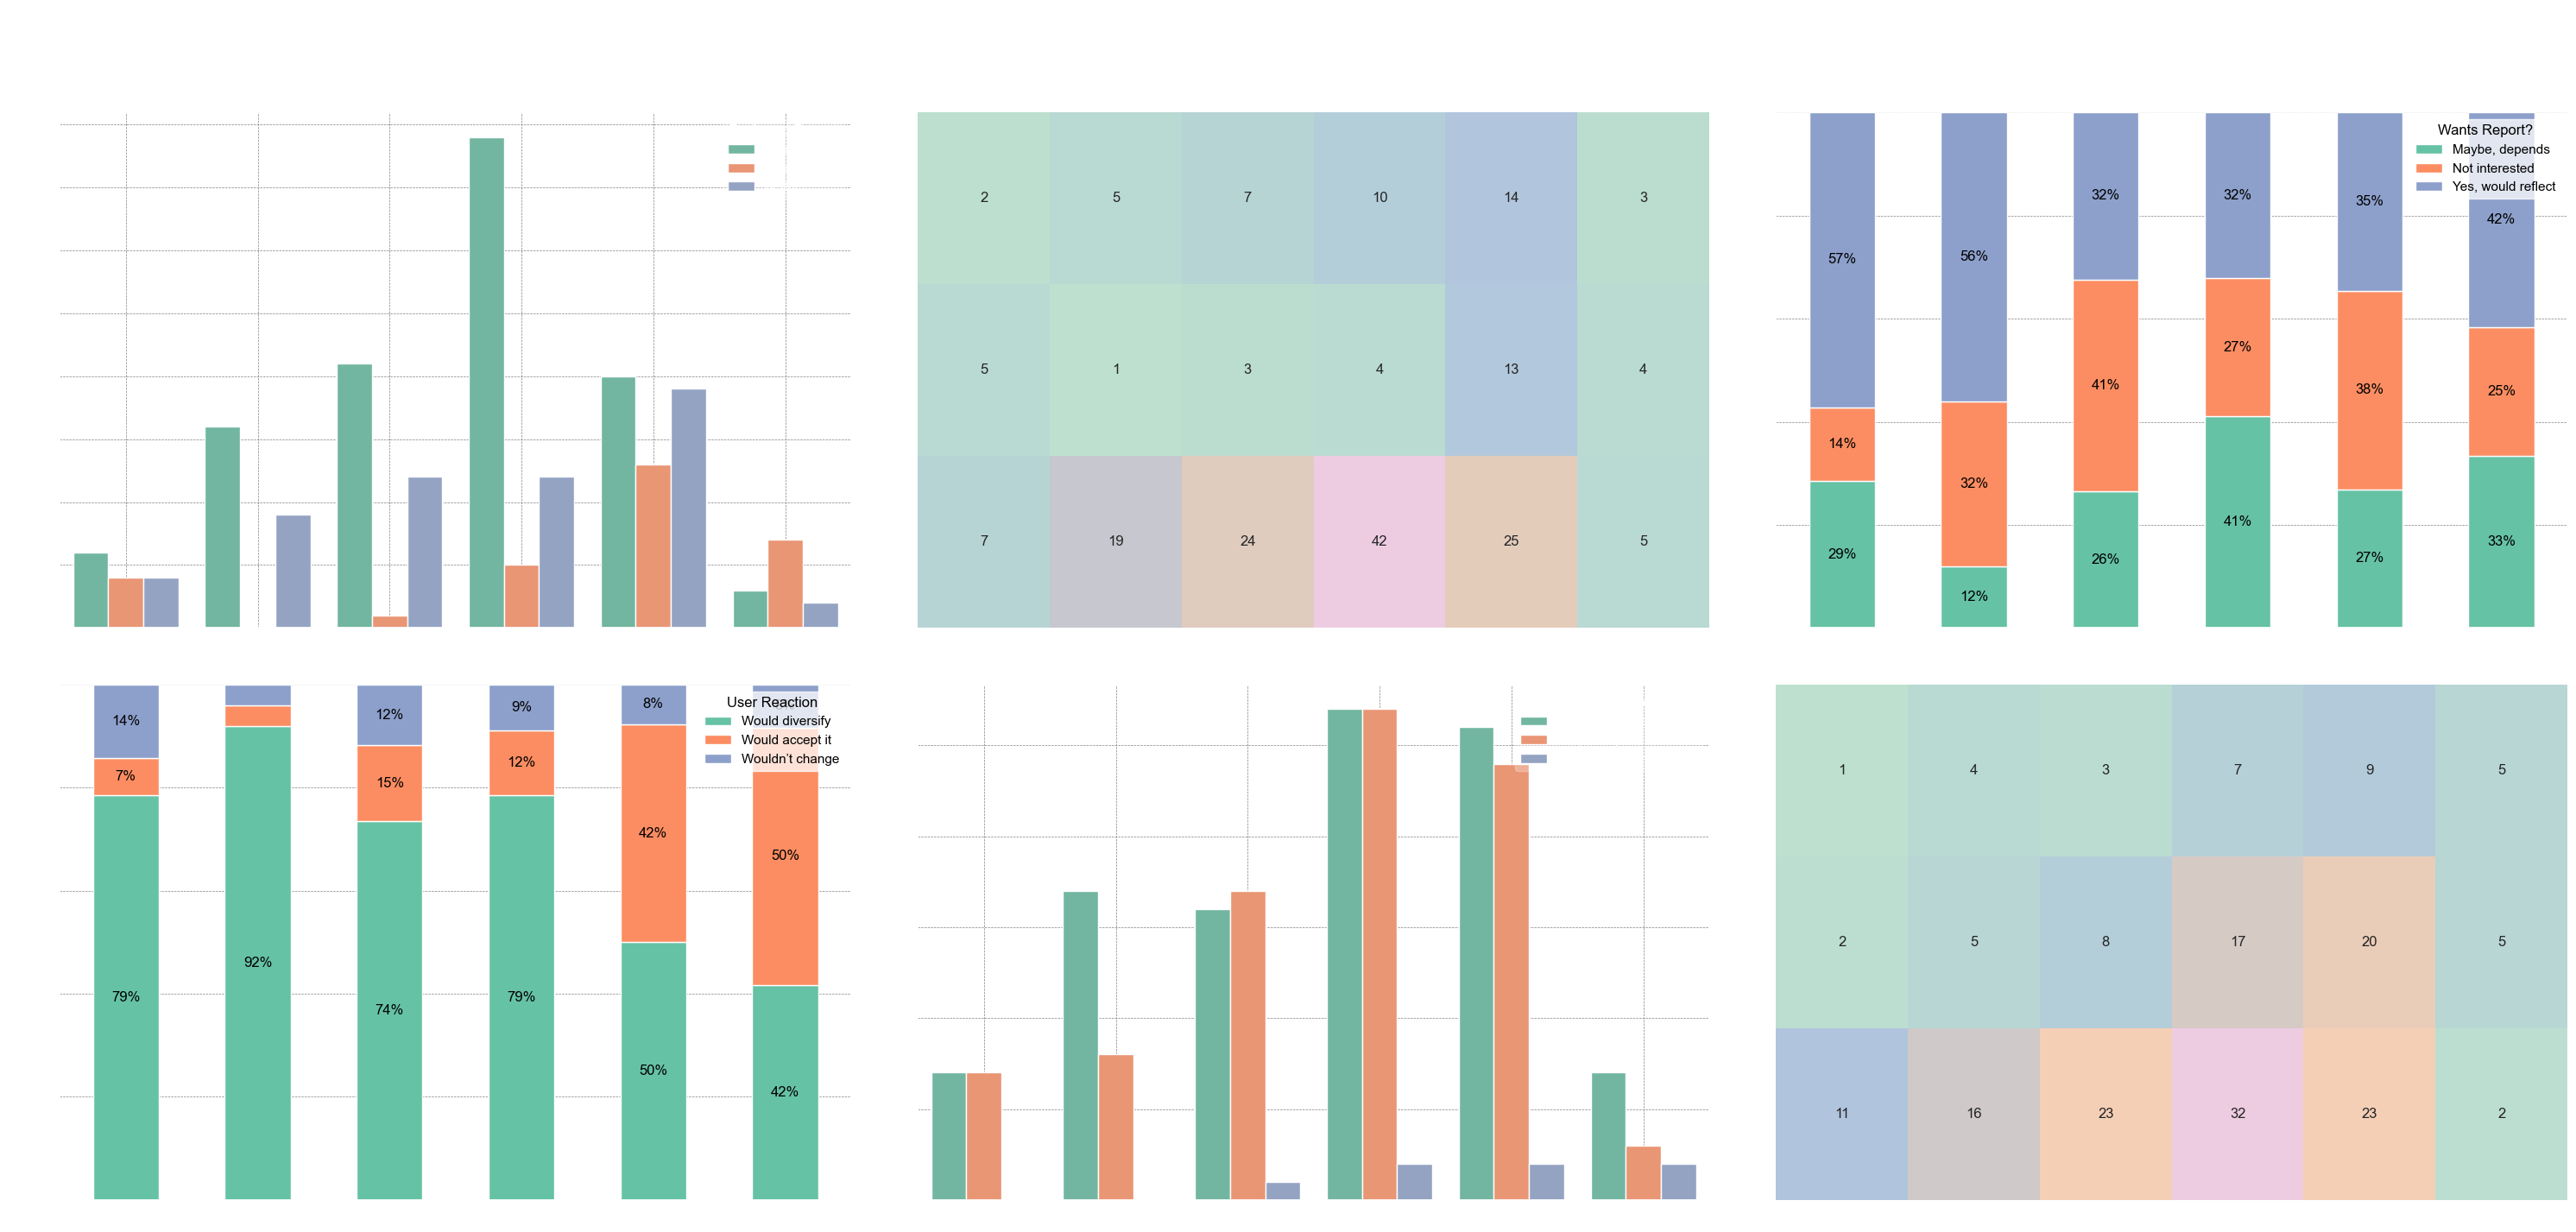

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(30, 15), facecolor='none')
axs = axs.flatten()
fig.suptitle('Opinions and Preferences by Political Ideology', color='white', fontweight='bold')

ideo_order = ['Left', 'Center-left', 'Center', 'Center-right', 'Right', 'Far-right']
set2_colors = sns.color_palette("Set2")
stacked_colors = sns.color_palette("Set2", 3)

# Estilo global
plt.style.use("dark_background")

# 1. Preferred Report × Ideology
sns.countplot(data=survey_results, x='Ideology', hue='Preferred Report', order=ideo_order, palette=set2_colors, ax=axs[0])
axs[0].set_title('Preferred Report by Ideology', color='white', fontweight='bold')
axs[0].set_xlabel('', color='white')
axs[0].set_ylabel('Count', color='white', fontweight='bold')
axs[0].tick_params(colors='white')
axs[0].grid(True, ls='--', linewidth=0.5, color='gray')
legend0 = axs[0].legend(title='Preferred Report', loc='upper right', labelcolor='white')
legend0.get_frame().set_facecolor("white")           
legend0.get_frame().set_alpha(0.25)
legend0.get_frame().set_edgecolor("white")

# 2. Opinion on One-sided Report × Ideology
ct_opinion = pd.crosstab(survey_results['Opinion on One-sided Report'], survey_results['Ideology'])
ct_opinion = ct_opinion[ideo_order]
ct_opinion.index = [
    "Not a concern,\npersonal choice",
    "Understandable,\nseeks alignment",
    "Worrisome,\nbias risk"
]
sns.heatmap(ct_opinion, annot=True, fmt='d', cmap=pastel_palette, ax=axs[1], cbar=False)
axs[1].set_title('Opinion on One-sided Report by Ideology', color='white', fontweight='bold')
axs[1].set_xlabel('', color='white')
axs[1].set_ylabel('', color='white')
axs[1].tick_params(colors='white')

# 3. Wants Own Report? × Ideology
ct_wants_report = pd.crosstab(survey_results['Ideology'], survey_results['Wants Own Report?'])
ct_wants_report = ct_wants_report.reindex(index=ideo_order)
ct_wants_report_pct = ct_wants_report.div(ct_wants_report.sum(axis=1), axis=0) * 100
ct_wants_report_pct.plot(kind='bar', stacked=True, ax=axs[2], color=stacked_colors)
axs[2].set_title('Interest in Personalized Balance Report by Ideology', color='white', fontweight='bold')
axs[2].set_ylabel('Percentage', color='white', fontweight='bold')
axs[2].set_xlabel('', color='white')
axs[2].set_ylim(0, 100)
axs[2].tick_params(colors='white', axis='x', rotation=0)
axs[2].grid(True, ls='--', linewidth=0.5, color='gray')
legend2 = axs[2].legend(title='Wants Report?', loc='upper right', labelcolor='black')
legend2.get_title().set_color('black')
legend2.get_frame().set_facecolor("white")           
legend2.get_frame().set_alpha(0.75)
legend2.get_frame().set_edgecolor("white")

for i, ideology in enumerate(ct_wants_report_pct.index):
    cumulative = 0
    for label in ct_wants_report_pct.columns:
        value = ct_wants_report_pct.loc[ideology, label]
        if value > 5:
            axs[2].text(
                i,
                cumulative + value / 2,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12,
                color='black'
            )
        cumulative += value

# 4. If Polarized Report... × Ideology
ct_action = pd.crosstab(survey_results['Ideology'], survey_results['If Polarized Report...'])[[
    'Would diversify', 'Would accept it', 'Wouldn’t change'
]]
ct_action = ct_action.reindex(index=ideo_order)
ct_action_pct = ct_action.div(ct_action.sum(axis=1), axis=0) * 100
ct_action_pct.plot(kind='bar', stacked=True, ax=axs[3], color=stacked_colors)
axs[3].set_title('Action if Own Report is Polarized by Ideology', color='white', fontweight='bold')
axs[3].set_ylabel('Percentage', color='white', fontweight='bold')
axs[3].set_xlabel('', color='white')
axs[3].set_ylim(0, 100)
axs[3].tick_params(colors='white', axis='x', rotation=0)
axs[3].grid(True, ls='--', linewidth=0.5, color='gray')
legend3 = axs[3].legend(title='User Reaction', loc='upper right', labelcolor='black')
legend3.get_title().set_color('black')
legend3.get_frame().set_facecolor("white")           
legend3.get_frame().set_alpha(0.75)
legend3.get_frame().set_edgecolor("white")

for i, ideology in enumerate(ct_action_pct.index):
    cumulative = 0
    for label in ct_action_pct.columns:
        value = ct_action_pct.loc[ideology, label]
        if value > 5:
            axs[3].text(
                i,
                cumulative + value / 2,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12,
                color='black'
            )
        cumulative += value

# 5. Comfort with Opposing Views × Ideology
sns.countplot(data=survey_results, x='Ideology', hue='Comfort with Opposing Views?', order=ideo_order, palette=set2_colors, ax=axs[4])
axs[4].set_title('Comfort with Opposing Views by Ideology', color='white', fontweight='bold')
axs[4].set_xlabel('', color='white')
axs[4].set_ylabel('Count', color='white', fontweight='bold')
axs[4].tick_params(colors='white')
axs[4].grid(True, ls='--', linewidth=0.5, color='gray')
legend4 = axs[4].legend(title='Comfort Level', loc='upper right', labelcolor='white')
legend4.get_frame().set_facecolor("white")           
legend4.get_frame().set_alpha(0.25)
legend4.get_frame().set_edgecolor("white")

# 6. Diversity Helps Understanding? × Ideology
ct_diversity = pd.crosstab(survey_results['Diversity Helps Understanding?'], survey_results['Ideology'])
ct_diversity = ct_diversity[ideo_order]
sns.heatmap(ct_diversity, annot=True, fmt='d', cmap=pastel_palette, ax=axs[5], cbar=False)
axs[5].set_title('Perception of Diversity Helping Understanding by Ideology', color='white', fontweight='bold')
axs[5].set_xlabel('', color='white')
axs[5].set_ylabel('', color='white')
axs[5].tick_params(colors='white')

# Fondo transparente para cada subplot
for ax in axs:
    ax.set_facecolor('none')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


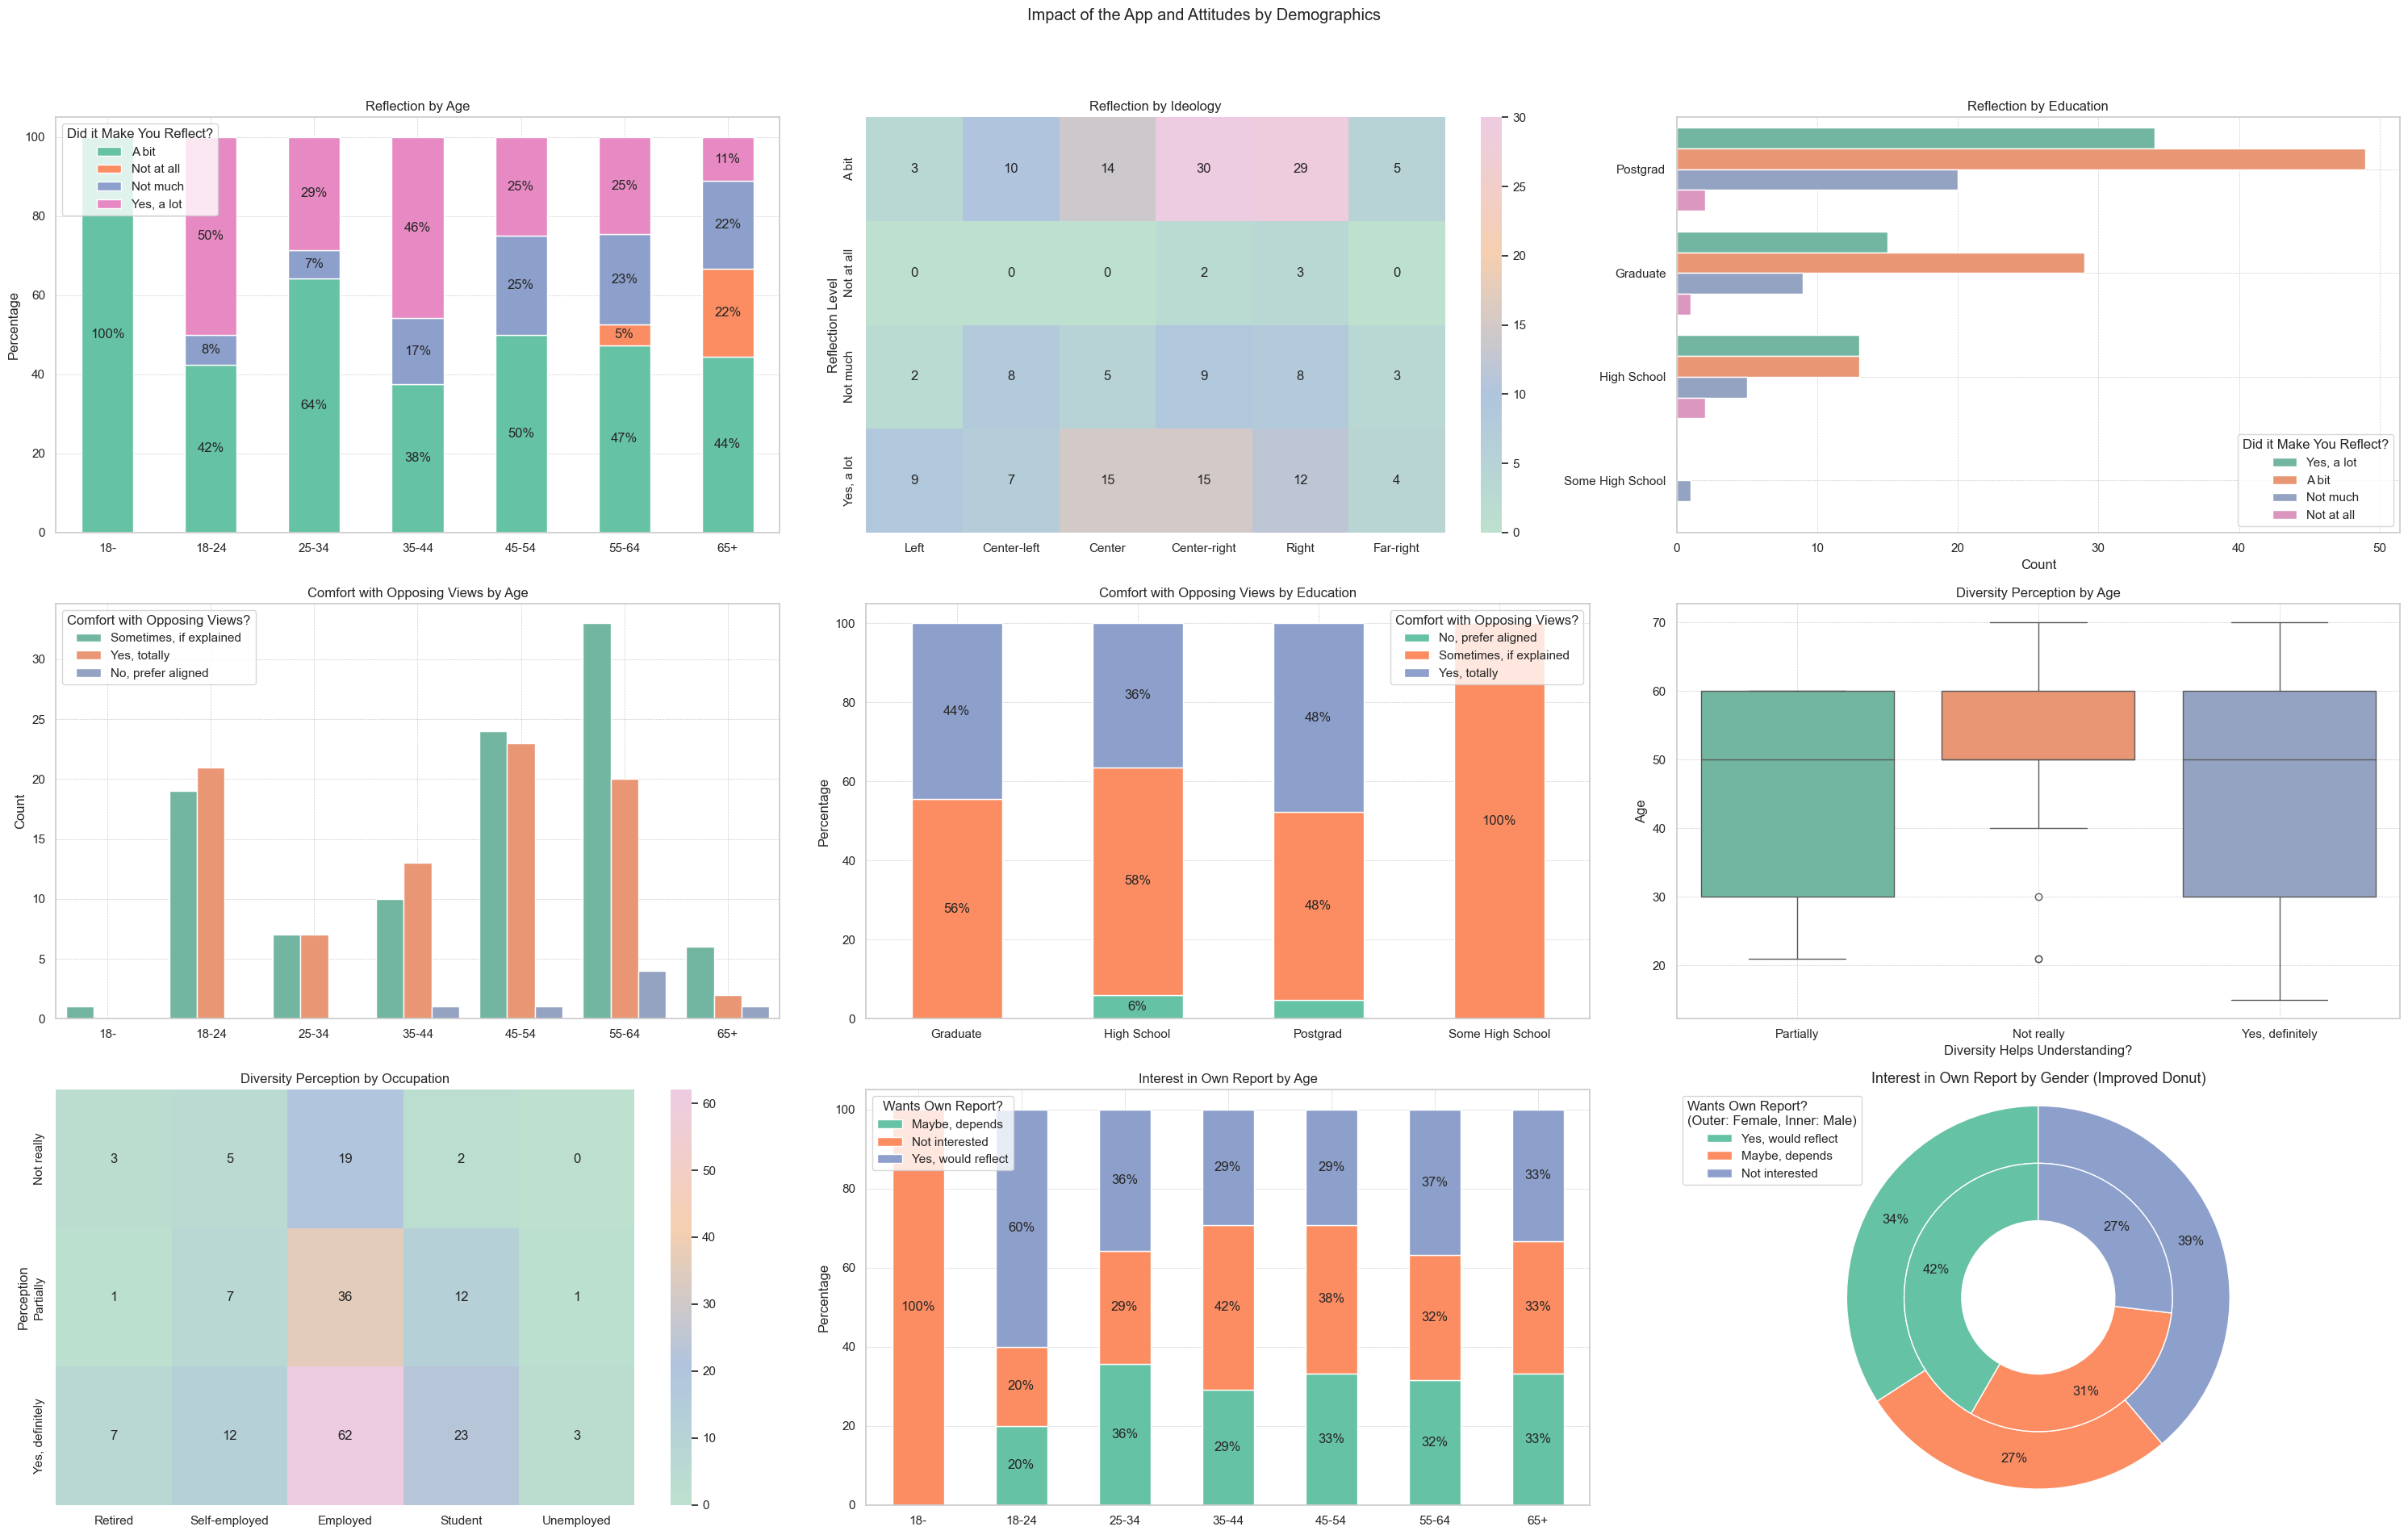

In [9]:
from matplotlib.patches import Patch
import numpy as np

fig, axs = plt.subplots(3, 3, figsize=(30, 20))
axs = axs.flatten()
fig.suptitle('Impact of the App and Attitudes by Demographics')

# 1. Did it Make You Reflect? × Age
ct_reflect_age = pd.crosstab(survey_results['Age'], survey_results['Did it Make You Reflect?'])
ct_reflect_age = ct_reflect_age.div(ct_reflect_age.sum(axis=1), axis=0) * 100
ct_reflect_age.plot(kind='bar', stacked=True, ax=axs[0], color=sns.color_palette("Set2", 4))
axs[0].set_title('Reflection by Age')
axs[0].set_xlabel('')
axs[0].set_ylabel('Percentage')
axs[0].tick_params(axis='x', rotation=0)
axs[0].grid(True, ls='--', linewidth=0.5)
for i, age in enumerate(ct_reflect_age.index):
    cumulative = 0
    for j, label in enumerate(ct_reflect_age.columns):
        value = ct_reflect_age.loc[age, label]
        if value > 5:
            axs[0].text(
                i,
                cumulative + value / 2,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12
            )
        cumulative += value

# 2. Did it Make You Reflect? × Ideology
ct_reflect_ideo = pd.crosstab(survey_results['Did it Make You Reflect?'], survey_results['Ideology'])[ideo_order]
sns.heatmap(ct_reflect_ideo, annot=True, fmt='d', cmap=pastel_palette, ax=axs[1])
axs[1].set_title('Reflection by Ideology')
axs[1].set_xlabel('')
axs[1].set_ylabel('Reflection Level')

# 3. Did it Make You Reflect? × Occupation
sns.countplot(data=survey_results, y='Education', hue='Did it Make You Reflect?', order=edu_order, palette="Set2", ax=axs[2])
axs[2].set_title('Reflection by Education')
axs[2].set_ylabel('')
axs[2].set_xlabel('Count')
axs[2].grid(True, ls='--', linewidth=0.5)

# 4. Comfort with Opposing Views? × Age
sns.countplot(data=survey_results, x='Age', hue='Comfort with Opposing Views?', order=age_order, palette="Set2", ax=axs[3])
axs[3].set_xlabel('')
axs[3].set_ylabel('Count')
axs[3].set_title('Comfort with Opposing Views by Age')
axs[3].grid(True, ls='--', linewidth=0.5)

# 5. Comfort with Opposing Views? × Education
ct_comfort_edu = pd.crosstab(survey_results['Education'], survey_results['Comfort with Opposing Views?'])
ct_comfort_edu = ct_comfort_edu.div(ct_comfort_edu.sum(axis=1), axis=0) * 100
ct_comfort_edu.plot(kind='bar', stacked=True, ax=axs[4], color=sns.color_palette("Set2", 4))
axs[4].set_title('Comfort with Opposing Views by Education')
axs[4].set_ylabel('Percentage')
axs[4].set_xlabel('')
axs[4].tick_params(axis='x', rotation=0)
axs[4].grid(True, ls='--', linewidth=0.5)
for i, edu in enumerate(ct_comfort_edu.index):
    cumulative = 0
    for j, label in enumerate(ct_comfort_edu.columns):
        value = ct_comfort_edu.loc[edu, label]
        if value > 5:
            axs[4].text(
                i,
                cumulative + value / 2,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12
            )
        cumulative += value

# 6. Diversity Helps Understanding? × Age
sns.boxplot(data=survey_results, x='Diversity Helps Understanding?', y='Age_num', palette="Set2", ax=axs[5])
axs[5].set_title('Diversity Perception by Age')
axs[5].set_ylabel('Age')
axs[5].grid(True, ls='--', linewidth=0.5)

# 7. Diversity Helps Understanding? × Occupation
ct_div_occ = pd.crosstab(survey_results['Diversity Helps Understanding?'], survey_results['Occupation'])[occupation_order]
sns.heatmap(ct_div_occ, annot=True, fmt='d', cmap=pastel_palette, ax=axs[6])
axs[6].set_title('Diversity Perception by Occupation')
axs[6].tick_params(axis='x', rotation=0)
axs[6].set_xlabel('')
axs[6].set_ylabel('Perception')

# 8. Wants Own Report? × Age
ct_report_age = pd.crosstab(survey_results['Age'], survey_results['Wants Own Report?'])
ct_report_age = ct_report_age.div(ct_report_age.sum(axis=1), axis=0) * 100
ct_report_age.plot(kind='bar', stacked=True, ax=axs[7], color=set2_colors)
axs[7].set_title('Interest in Own Report by Age')
axs[7].set_ylabel('Percentage')
axs[7].set_xlabel('')
axs[7].tick_params(axis='x', rotation=0)
axs[7].grid(True, ls='--', linewidth=0.5)
for i, age in enumerate(ct_report_age.index):
    cumulative = 0
    for j, label in enumerate(ct_report_age.columns):
        value = ct_report_age.loc[age, label]
        if value > 5:
            axs[7].text(
                i,
                cumulative + value / 2,
                f'{value:.0f}%',
                ha='center',
                va='center',
                fontsize=12
            )
        cumulative += value

# 9. Wants Own Report? × Gender (donut chart por género)
gender_report = survey_results.groupby('Gender')['Wants Own Report?'].value_counts().unstack().fillna(0)
gender_report = gender_report.reindex(['Female', 'Male'])
gender_report = gender_report[['Yes, would reflect', 'Maybe, depends', 'Not interested']]
colors = sns.color_palette("Set2", n_colors=len(gender_report.columns))
axs[8].axis('equal')
radii = [1.0, 0.7]
width = 0.3

for i, (gender, row) in enumerate(gender_report.iterrows()):
    values = row.values
    total = values.sum()
    wedges, _ = axs[8].pie(
        values,
        radius=radii[i],
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=width, edgecolor='white')
    )
    angle_offsets = np.cumsum(np.insert(values / total, 0, 0)) * 360 + 90
    for j, (v, start, end) in enumerate(zip(values, angle_offsets[:-1], angle_offsets[1:])):
        mid_angle = (start + end) / 2
        x = (radii[i] - width / 2) * np.cos(np.radians(mid_angle))
        y = (radii[i] - width / 2) * np.sin(np.radians(mid_angle))
        if v / total > 0.05:
            axs[8].text(x, y, f'{v/total:.0%}', ha='center', va='center', fontsize=12)

axs[8].set_title('Interest in Own Report by Gender (Improved Donut)', fontsize=13)
legend_labels = gender_report.columns
legend_colors = colors
legend_patches = [Patch(facecolor=color, label=label) for color, label in zip(legend_colors, legend_labels)]

axs[8].legend(
    handles=legend_patches,
    title='Wants Own Report?\n(Outer: Female, Inner: Male)',
    loc='upper left',
    frameon=True,
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

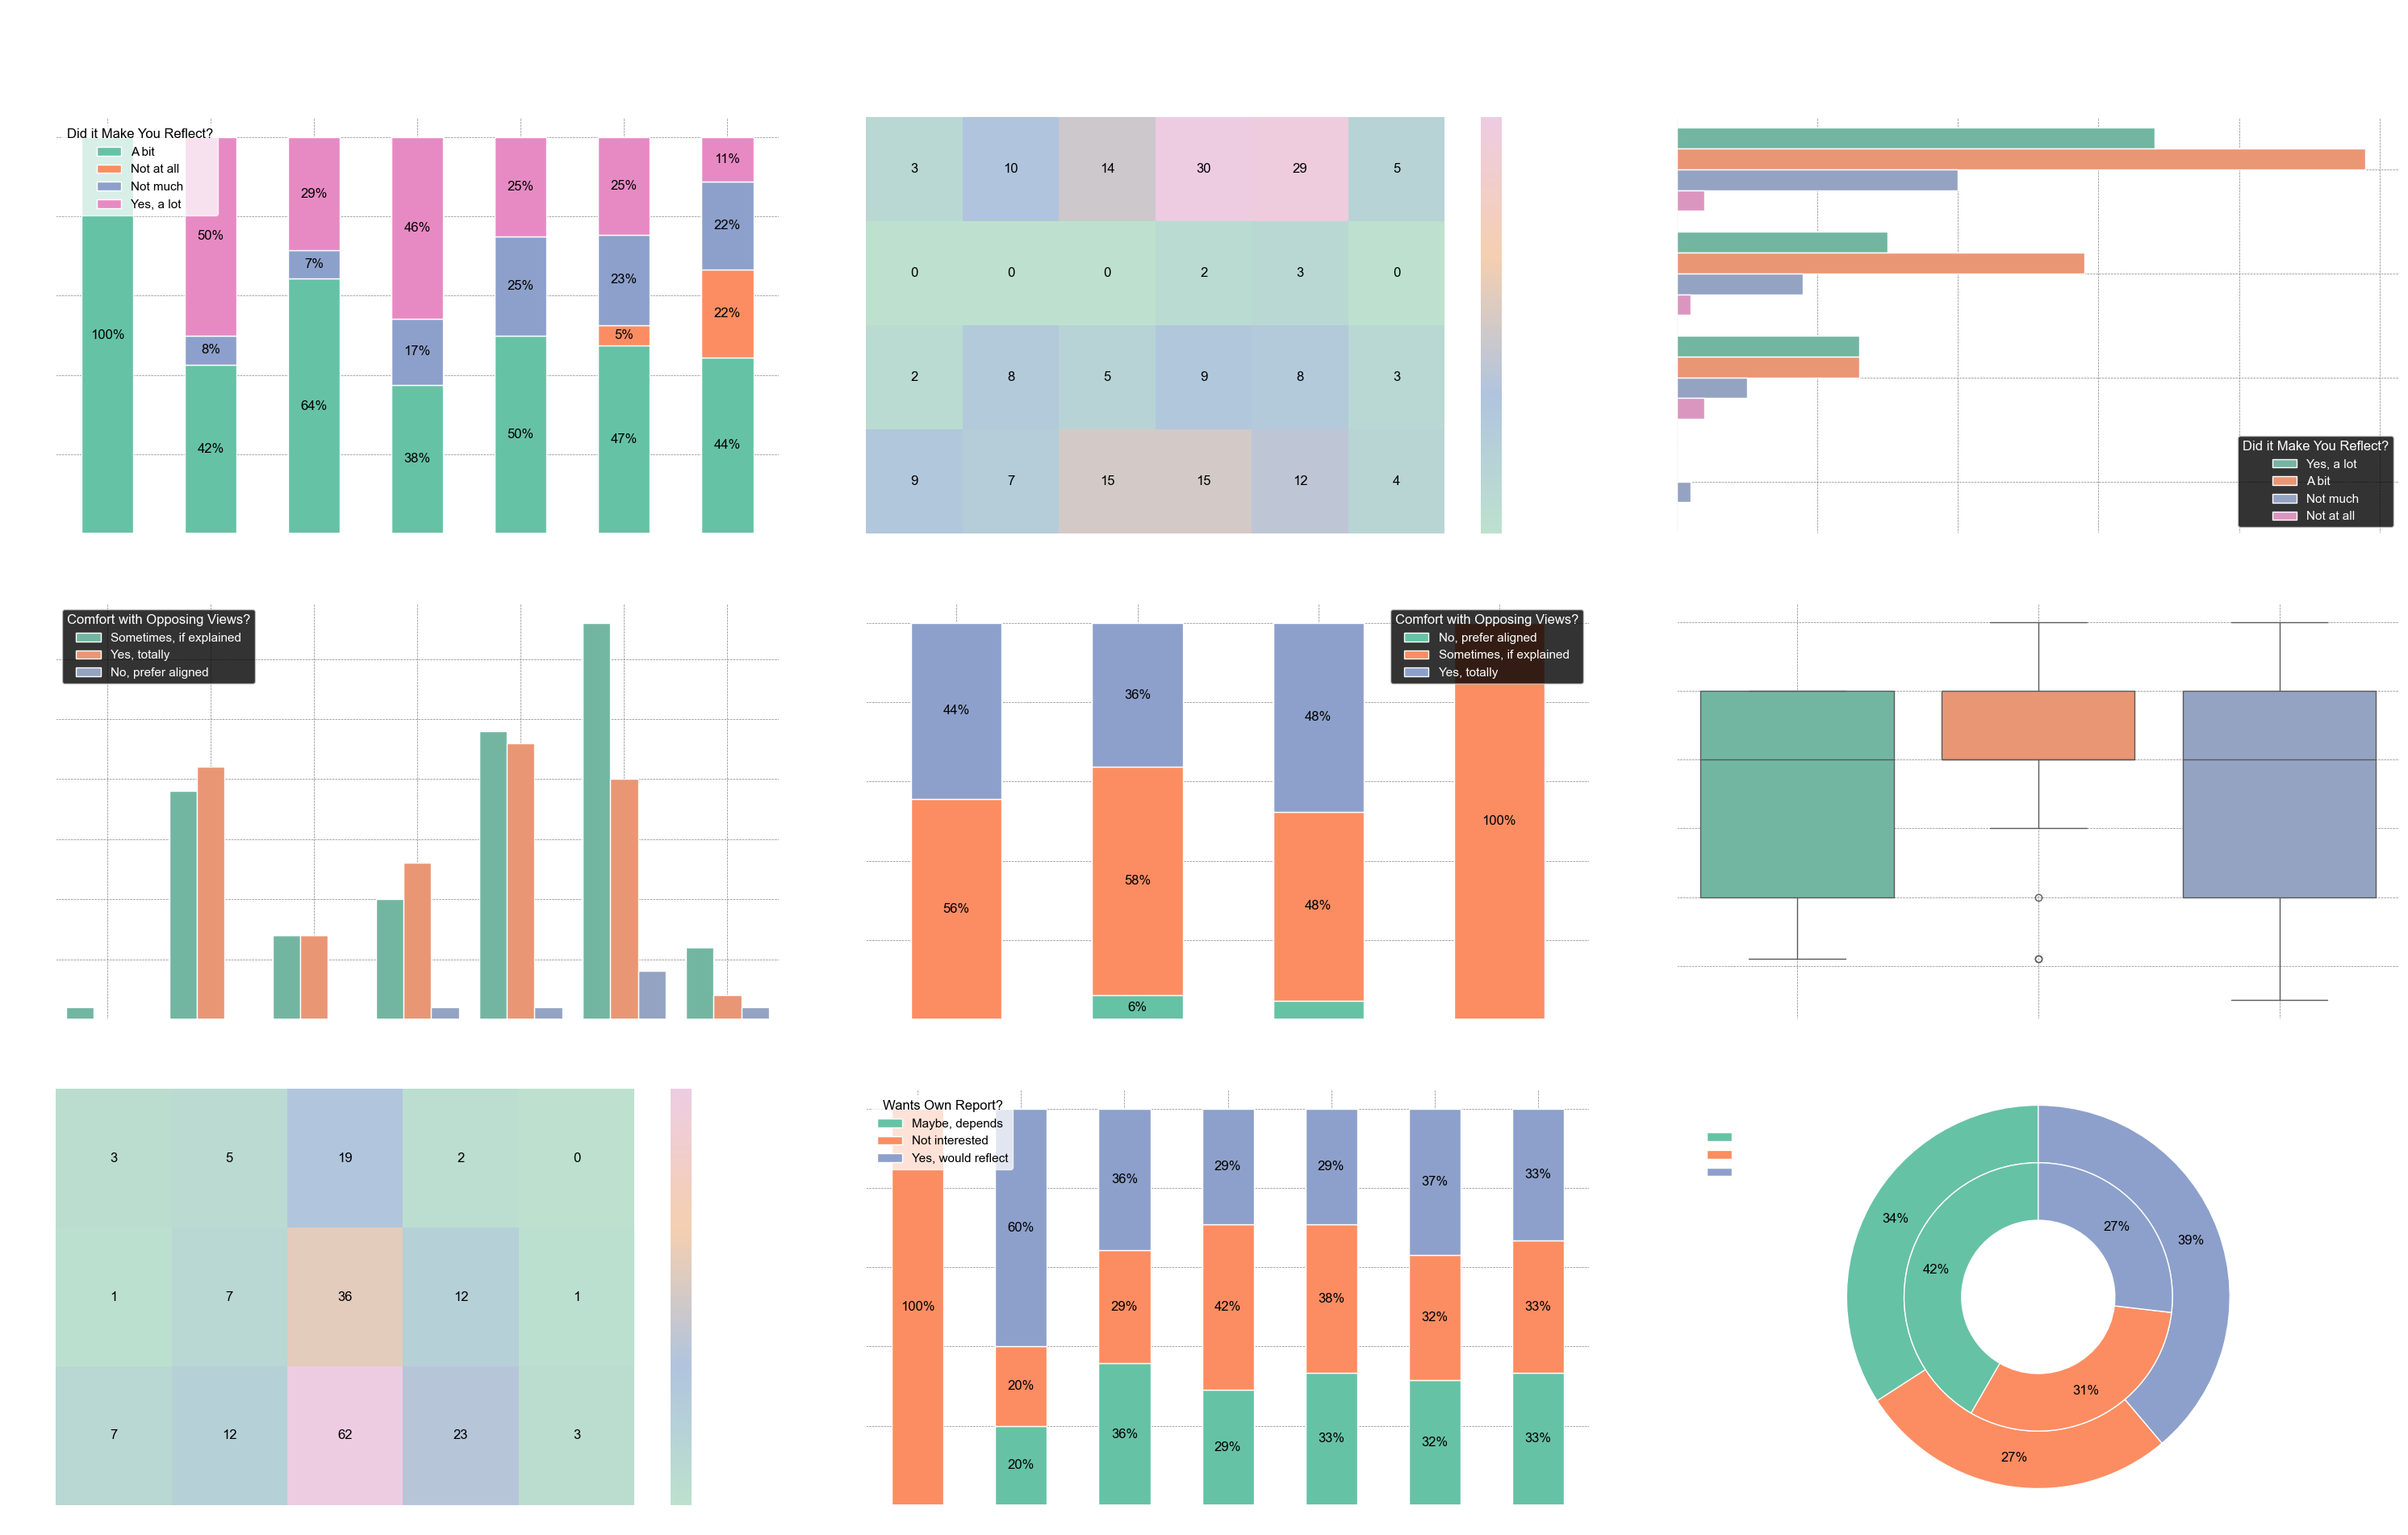

In [42]:
from matplotlib.patches import Patch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
fig, axs = plt.subplots(3, 3, figsize=(30, 20), facecolor='none')
axs = axs.flatten()
fig.suptitle('Impact of the App and Attitudes by Demographics', color='white', fontweight='bold')

# 1. Reflection by Age
ct_reflect_age = pd.crosstab(survey_results['Age'], survey_results['Did it Make You Reflect?'])
ct_reflect_age = ct_reflect_age.div(ct_reflect_age.sum(axis=1), axis=0) * 100
ct_reflect_age.plot(kind='bar', stacked=True, ax=axs[0], color=sns.color_palette("Set2", 4))
axs[0].set_title('Reflection by Age', color='white', fontweight='bold')
axs[0].set_xlabel('', color='white')
axs[0].set_ylabel('Percentage', color='white', fontweight='bold')
axs[0].tick_params(axis='x', rotation=0, colors='white')
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontweight='bold', color='white')
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontweight='bold', color='white')
axs[0].grid(True, ls='--', linewidth=0.5, color='gray')
for i, age in enumerate(ct_reflect_age.index):
    cumulative = 0
    for j, label in enumerate(ct_reflect_age.columns):
        value = ct_reflect_age.loc[age, label]
        if value > 5:
            axs[0].text(i, cumulative + value / 2, f'{value:.0f}%', ha='center', va='center', fontsize=12, color='black')
        cumulative += value
legend0 = axs[0].legend(title='Did it Make You Reflect?', loc='upper left', labelcolor='black')
legend0.get_title().set_color('black')
legend0.get_frame().set_facecolor("white")           
legend0.get_frame().set_alpha(0.75)
legend0.get_frame().set_edgecolor("white")

# 2. Reflection by Ideology
ct_reflect_ideo = pd.crosstab(survey_results['Did it Make You Reflect?'], survey_results['Ideology'])[ideo_order]
sns.heatmap(ct_reflect_ideo, annot=True, fmt='d', cmap=pastel_palette, ax=axs[1], annot_kws={"color": "black"})
axs[1].set_title('Reflection by Ideology', color='white', fontweight='bold')
axs[1].set_xlabel('', color='white')
axs[1].set_ylabel('Reflection Level', color='white', fontweight='bold')
axs[1].tick_params(colors='white')
axs[1].set_xticklabels(axs[1].get_xticklabels(), color='white', fontweight='bold')
axs[1].set_yticklabels(axs[1].get_yticklabels(), color='white', fontweight='bold')

# 3. Reflection by Education
sns.countplot(data=survey_results, y='Education', hue='Did it Make You Reflect?', order=edu_order, palette="Set2", ax=axs[2])
axs[2].set_title('Reflection by Education', color='white', fontweight='bold')
axs[2].set_ylabel('', color='white')
axs[2].set_xlabel('Count', color='white', fontweight='bold')
axs[2].tick_params(colors='white')
axs[2].grid(True, ls='--', linewidth=0.5, color='gray')

# 4. Comfort by Age
sns.countplot(data=survey_results, x='Age', hue='Comfort with Opposing Views?', order=age_order, palette="Set2", ax=axs[3])
axs[3].set_title('Comfort with Opposing Views by Age', color='white', fontweight='bold')
axs[3].set_xlabel('', color='white')
axs[3].set_ylabel('Count', color='white', fontweight='bold')
axs[3].tick_params(colors='white')
axs[3].grid(True, ls='--', linewidth=0.5, color='gray')

# 5. Comfort by Education
ct_comfort_edu = pd.crosstab(survey_results['Education'], survey_results['Comfort with Opposing Views?'])
ct_comfort_edu = ct_comfort_edu.div(ct_comfort_edu.sum(axis=1), axis=0) * 100
ct_comfort_edu.plot(kind='bar', stacked=True, ax=axs[4], color=sns.color_palette("Set2", 4))
axs[4].set_title('Comfort with Opposing Views by Education', color='white', fontweight='bold')
axs[4].set_ylabel('Percentage', color='white', fontweight='bold')
axs[4].set_xlabel('', color='white')
axs[4].tick_params(axis='x', rotation=0, colors='white')
axs[4].set_xticklabels(axs[4].get_xticklabels(), fontweight='bold', color='white')
axs[4].set_yticklabels(axs[4].get_yticklabels(), fontweight='bold', color='white')
axs[4].grid(True, ls='--', linewidth=0.5, color='gray')
for i, edu in enumerate(ct_comfort_edu.index):
    cumulative = 0
    for j, label in enumerate(ct_comfort_edu.columns):
        value = ct_comfort_edu.loc[edu, label]
        if value > 5:
            axs[4].text(i, cumulative + value / 2, f'{value:.0f}%', ha='center', va='center', fontsize=12, color='black')
        cumulative += value

# 6. Diversity Perception by Age
sns.boxplot(data=survey_results, x='Diversity Helps Understanding?', y='Age_num', palette="Set2", ax=axs[5])
axs[5].set_title('Diversity Perception by Age', color='white', fontweight='bold')
axs[5].set_ylabel('Age', color='white', fontweight='bold')
axs[5].tick_params(colors='white')
axs[5].set_xticklabels(axs[5].get_xticklabels(), fontweight='bold', color='white')
axs[5].set_yticklabels(axs[5].get_yticklabels(), fontweight='bold', color='white')
axs[5].grid(True, ls='--', linewidth=0.5, color='gray')

# 7. Diversity Perception by Occupation
ct_div_occ = pd.crosstab(survey_results['Diversity Helps Understanding?'], survey_results['Occupation'])[occupation_order]
sns.heatmap(ct_div_occ, annot=True, fmt='d', cmap=pastel_palette, ax=axs[6], annot_kws={"color": "black"})
axs[6].set_title('Diversity Perception by Occupation', color='white', fontweight='bold')
axs[6].tick_params(colors='white')
axs[6].set_xlabel('', color='white')
axs[6].set_ylabel('Perception', color='white', fontweight='bold')
axs[6].set_xticklabels(axs[6].get_xticklabels(), color='white', fontweight='bold')
axs[6].set_yticklabels(axs[6].get_yticklabels(), color='white', fontweight='bold')

# 8. Interest in Own Report by Age
ct_report_age = pd.crosstab(survey_results['Age'], survey_results['Wants Own Report?'])
ct_report_age = ct_report_age.div(ct_report_age.sum(axis=1), axis=0) * 100
ct_report_age.plot(kind='bar', stacked=True, ax=axs[7], color=set2_colors)
axs[7].set_title('Interest in Own Report by Age', color='white', fontweight='bold')
axs[7].set_ylabel('Percentage', color='white', fontweight='bold')
axs[7].set_xlabel('', color='white')
axs[7].tick_params(axis='x', rotation=0, colors='white')
axs[7].set_xticklabels(axs[7].get_xticklabels(), fontweight='bold', color='white')
axs[7].set_yticklabels(axs[7].get_yticklabels(), fontweight='bold', color='white')
axs[7].grid(True, ls='--', linewidth=0.5, color='gray')
for i, age in enumerate(ct_report_age.index):
    cumulative = 0
    for j, label in enumerate(ct_report_age.columns):
        value = ct_report_age.loc[age, label]
        if value > 5:
            axs[7].text(i, cumulative + value / 2, f'{value:.0f}%', ha='center', va='center', fontsize=12, color='black')
        cumulative += value
legend7 = axs[7].legend(title='Wants Own Report?', loc='upper left', labelcolor='black')
legend7.get_title().set_color('black')
legend7.get_frame().set_facecolor("white")           
legend7.get_frame().set_alpha(0.75)
legend7.get_frame().set_edgecolor("white")

# 9. Donut chart Gender
gender_report = survey_results.groupby('Gender')['Wants Own Report?'].value_counts().unstack().fillna(0)
gender_report = gender_report.reindex(['Female', 'Male'])
gender_report = gender_report[['Yes, would reflect', 'Maybe, depends', 'Not interested']]
colors = sns.color_palette("Set2", n_colors=len(gender_report.columns))
axs[8].axis('equal')
radii = [1.0, 0.7]
width = 0.3

for i, (gender, row) in enumerate(gender_report.iterrows()):
    values = row.values
    total = values.sum()
    wedges, _ = axs[8].pie(
        values,
        radius=radii[i],
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=width, edgecolor='white')
    )
    angle_offsets = np.cumsum(np.insert(values / total, 0, 0)) * 360 + 90
    for j, (v, start, end) in enumerate(zip(values, angle_offsets[:-1], angle_offsets[1:])):
        mid_angle = (start + end) / 2
        x = (radii[i] - width / 2) * np.cos(np.radians(mid_angle))
        y = (radii[i] - width / 2) * np.sin(np.radians(mid_angle))
        if v / total > 0.05:
            axs[8].text(x, y, f'{v/total:.0%}', ha='center', va='center', fontsize=12, color='black')

axs[8].set_title('Interest in Own Report by Gender (Improved Donut)', color='white', fontweight='bold')
legend_labels = gender_report.columns
legend_patches = [Patch(facecolor=color, label=label) for color, label in zip(colors, legend_labels)]
legend8 = axs[8].legend(
    handles=legend_patches,
    title='Wants Own Report?\n(Outer: Female, Inner: Male)',
    loc='upper left',
    labelcolor='white',
    facecolor='none',
)
frame = legend8.get_frame()
frame.set_facecolor("none")
frame.set_edgecolor("white")
frame.set_linewidth(1.5)
legend8.get_title().set_color("white")

# Fondo transparente para todos los subplots
for ax in axs:
    ax.set_facecolor('none')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()